# Gerar uma tabela de valores aleatórios de NASA-TLX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
import random

random.seed(1)

# Criando valores aleatórios
df = []
part001 = []
part002 = []
part003 = []
n = 0
participantes = range(10)

for part in participantes:
    n = n+1
    for ncena in range(1,6):
        for netapa in range(1,3):
            DM = random.choice(range(1,21))
            DF = random.choice(range(1,21))
            DT = random.choice(range(1,21))
            PE = random.choice(range(1,21))
            ES = random.choice(range(1,21))
            FR = random.choice(range(1,21))

            part = ["Data " + str(n), "00" + str(n), ncena, netapa,DM,DF,DT,PE,ES,FR]
            df.append(part)
df


[['Data 1', '001', 1, 1, 5, 19, 3, 9, 4, 16],
 ['Data 1', '001', 1, 2, 15, 16, 13, 7, 4, 16],
 ['Data 1', '001', 2, 1, 1, 13, 14, 20, 1, 15],
 ['Data 1', '001', 2, 2, 9, 8, 19, 4, 11, 1],
 ['Data 1', '001', 3, 1, 1, 1, 18, 1, 13, 7],
 ['Data 1', '001', 3, 2, 14, 1, 17, 8, 15, 16],
 ['Data 1', '001', 4, 1, 18, 8, 12, 8, 8, 15],
 ['Data 1', '001', 4, 2, 10, 1, 14, 18, 4, 6],
 ['Data 1', '001', 5, 1, 10, 4, 11, 17, 14, 17],
 ['Data 1', '001', 5, 2, 7, 10, 10, 19, 16, 17],
 ['Data 2', '002', 1, 1, 13, 19, 2, 16, 8, 13],
 ['Data 2', '002', 1, 2, 14, 6, 12, 18, 12, 3],
 ['Data 2', '002', 2, 1, 15, 17, 4, 6, 17, 13],
 ['Data 2', '002', 2, 2, 12, 16, 1, 16, 2, 10],
 ['Data 2', '002', 3, 1, 20, 19, 19, 13, 6, 6],
 ['Data 2', '002', 3, 2, 17, 8, 1, 7, 18, 18],
 ['Data 2', '002', 4, 1, 8, 13, 17, 12, 19, 12],
 ['Data 2', '002', 4, 2, 15, 9, 18, 20, 1, 13],
 ['Data 2', '002', 5, 1, 17, 5, 17, 18, 7, 14],
 ['Data 2', '002', 5, 2, 2, 16, 12, 19, 18, 7],
 ['Data 3', '003', 1, 1, 17, 14, 16, 12, 14, 1

In [3]:
# Criando o template de DataFrame utilizado pelo Google Forms
nasa_df = pd.DataFrame(df,columns=["Carimbo de data/hora", "Participante","Método", "Etapa", "Demanda Mental", "Demanda física", "Demanda Temporal", "Perfomance", "Esforço",	"Frustação"])

nasa_df.to_csv("Nasa.txt",index=False)
nasa_df

,Carimbo de data/hora,Participante,Método,Etapa,Demanda Mental,Demanda física,Demanda Temporal,Perfomance,Esforço,Frustação
0,Data 1,001,1,1,5,19,3,9,4,16
1,Data 1,001,1,2,15,16,13,7,4,16
2,Data 1,001,2,1,1,13,14,20,1,15
3,Data 1,001,2,2,9,8,19,4,11,1
4,Data 1,001,3,1,1,1,18,1,13,7
...,...,...,...,...,...,...,...,...,...,...
95,Data 10,0010,3,2,4,10,9,8,13,18
96,Data 10,0010,4,1,1,7,17,15,19,1
97,Data 10,0010,4,2,1,20,8,9,7,6
98,Data 10,0010,5,1,10,5,18,7,9,10


# Reestruturar os dados

In [4]:
nasa_df = []
nasa_df = pd.read_csv("Nasa.txt")
nasa_df.head()

# Criar uma coluna contendo as informações do Método e da Etapa de cada experimento.
cena = []
for i in range(len(nasa_df['Método'])):
    cena.append(str(nasa_df['Método'][i]) + "," + str(nasa_df['Etapa'][i]))
cena = pd.Series(cena, name = "Cena")


# Reorganizar os dados gerando uma tabela por pergunta do questionário (usando melt).
dimensoesNasa = []
dimensoesNasa_melt = []
for col in range(4,len(nasa_df.columns)):
    dim = pd.concat(objs = [nasa_df['Participante'],nasa_df['Método'],nasa_df['Etapa'],cena,nasa_df[nasa_df.columns[col]]], axis=1, join='outer')
    dimensoesNasa.append(dim)
    dimensoesNasa_melt.append(pd.melt(dim,id_vars = ['Participante','Método','Etapa','Cena'], value_vars=nasa_df.columns[col], var_name='Dimensões do NASA'))
    

# Reorganizar os dados gerando uma tabela por pergunta do questionário (usando pivot).
dimensoesNasa_pivot = []
for col in range(4,len(nasa_df.columns)):
    dim = pd.concat(objs = [nasa_df['Participante'],nasa_df['Método'],nasa_df['Etapa'],cena,nasa_df[nasa_df.columns[col]]], axis=1, join='outer')
    dim = dim.pivot(index =  'Participante', columns = ['Cena'], values =  dim.columns[4])
    dimensoesNasa_pivot.append(dim)
    


# Analisar os dados do NASA-TLX usando ANOVA

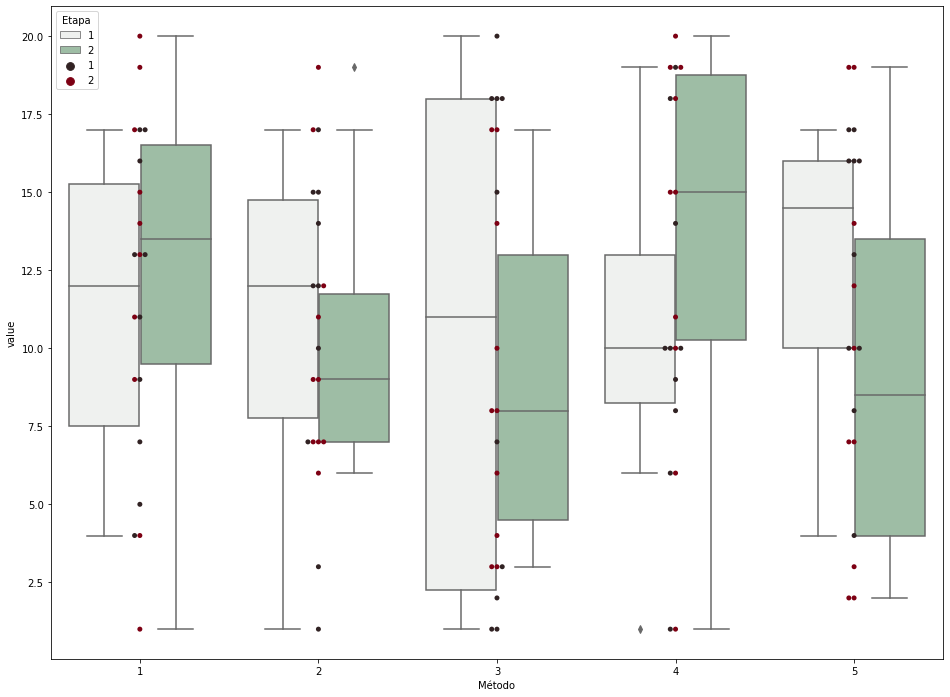

In [5]:
# Gerar um boxplot para ver a distribuição dos tratamentos e ver como está o comportamento da variância
plt.figure(figsize=(16, 12))
bp = sns.boxplot(x='Método', hue='Etapa', y='value', data=dimensoesNasa_melt[0], color='#99c2a2')
sp = sns.swarmplot(x="Método", hue='Etapa', y="value", data=dimensoesNasa_melt[0], color='#7d0013')
plt.show()

In [17]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(dimensoesNasa_pivot[0]['1,1'],dimensoesNasa_pivot[0]['1,2'],dimensoesNasa_pivot[0]['2,1'],dimensoesNasa_pivot[0]['2,2'],dimensoesNasa_pivot[0]['3,1'],dimensoesNasa_pivot[0]['3,2'],dimensoesNasa_pivot[0]['4,1'],dimensoesNasa_pivot[0]['4,2'],dimensoesNasa_pivot[0]['5,1'],dimensoesNasa_pivot[0]['5,2'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# Ordinary Least Squares (OLS) model
model = ols('value ~ 4(Método)', data=dimensoesNasa_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
## output (ANOVA F and p value)
#                sum_sq    df         F    PR(>F)
#C(treatments)  3010.95   3.0  17.49281  0.000026
#Residual        918.00  16.0       NaN       NaN
#
## ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
#from bioinfokit.analys import stat
#res = stat()
#res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
#res.anova_summary
## output (ANOVA F and p value)
#                 df   sum_sq   mean_sq         F    PR(>F)
#C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
#Residual       16.0   918.00    57.375       NaN       NaN
#
## note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
## (typ parameter) will produce similar results.

0.5903765552292003 0.8018383462480272


<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?


In [16]:
dimensoesNasa_melt

[    Participante  Método  Etapa Cena Dimensões do NASA  value
 0              1       1      1  1,1    Demanda Mental      5
 1              1       1      2  1,2    Demanda Mental     15
 2              1       2      1  2,1    Demanda Mental      1
 3              1       2      2  2,2    Demanda Mental      9
 4              1       3      1  3,1    Demanda Mental      1
 ..           ...     ...    ...  ...               ...    ...
 95            10       3      2  3,2    Demanda Mental      4
 96            10       4      1  4,1    Demanda Mental      1
 97            10       4      2  4,2    Demanda Mental      1
 98            10       5      1  5,1    Demanda Mental     10
 99            10       5      2  5,2    Demanda Mental     19
 
 [100 rows x 6 columns],
     Participante  Método  Etapa Cena Dimensões do NASA  value
 0              1       1      1  1,1    Demanda física     19
 1              1       1      2  1,2    Demanda física     16
 2              1       2   

In [6]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [15]:

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
## output (ANOVA F and p value)
#                sum_sq    df         F    PR(>F)
#C(treatments)  3010.95   3.0  17.49281  0.000026
#Residual        918.00  16.0       NaN       NaN
#
## ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
#from bioinfokit.analys import stat
#res = stat()
#res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
#res.anova_summary
## output (ANOVA F and p value)
#                 df   sum_sq   mean_sq         F    PR(>F)
#C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
#Residual       16.0   918.00    57.375       NaN       NaN
#
## note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
## (typ parameter) will produce similar results.

17.492810457516338 2.639241146210922e-05


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [14]:
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40
